##Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading csv file 

In [2]:
df = pd.read_csv("/content/drive/MyDrive/meta learning assignment/physionet_A_N.csv",header=None,index_col=None,low_memory=False)
df = df.drop(0)
signals_df = df.loc[:,0:269]
labels_df = df.loc[:,270]

## Features column stored as signals_df

In [3]:
signals_df = signals_df.astype(str).astype(float)
print(signals_df.info())
signals_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18370 entries, 1 to 18370
Columns: 270 entries, 0 to 269
dtypes: float64(270)
memory usage: 38.0 MB
None


,0,1,2,3,4,5,6,7,8,9,...,260,261,262,263,264,265,266,267,268,269
1,-127.0,-267.0,-241.0,-229.0,-215.0,-201.0,-253.0,-273.0,-226.0,-172.0,...,-26.0,-29.0,-22.0,-19.0,-22.0,-43.0,-53.0,-23.0,22.0,-31.0
2,-41.0,663.0,-39.0,-113.0,-81.0,-67.0,-45.0,34.0,82.0,62.0,...,-88.0,-22.0,42.0,104.0,32.0,2.0,2.0,-13.0,-16.0,6.0
3,7.0,7.0,12.0,18.0,36.0,80.0,0.0,-19.0,418.0,248.0,...,-27.0,-22.0,-33.0,-31.0,-34.0,-11.0,1.0,-8.0,12.0,62.0
4,128.0,268.0,244.0,209.0,194.0,234.0,203.0,188.0,211.0,228.0,...,1.0,-70.0,-62.0,-44.0,393.0,-74.0,-84.0,-65.0,-30.0,-6.0
5,13.0,54.0,80.0,56.0,-36.0,1469.0,-199.0,-180.0,-177.0,-126.0,...,0.0,-15.0,-37.0,-50.0,-21.0,30.0,17.0,1571.0,-165.0,-201.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18366,535.0,-186.0,-56.0,-37.0,51.0,156.0,188.0,-46.0,-108.0,-119.0,...,-352.0,-44.0,5.0,1.0,78.0,137.0,46.0,-45.0,-29.0,-33.0
18367,-278.0,-456.0,-410.0,-372.0,-295.0,-169.0,-117.0,-103.0,-187.0,-159.0,...,-38.0,7.0,-53.0,-72.0,-53.0,-13.0,358.0,-272.0,-15.0,21.0
18368,-45.0,-56.0,-69.0,-62.0,-474.0,28.0,-24.0,-24.0,-26.0,-14.0,...,32.0,49.0,50.0,32.0,23.0,46.0,46.0,27.0,-5.0,51.0
18369,-26.0,-13.0,63.0,20.0,-3.0,-21.0,-19.0,-82.0,-163.0,-239.0,...,61.0,15.0,37.0,30.0,137.0,-928.0,95.0,50.0,34.0,36.0


## Labels stored as labels_df

In [4]:
labels_df

1        N
2        N
3        N
4        N
5        N
        ..
18366    A
18367    A
18368    A
18369    A
18370    A
Name: 270, Length: 18370, dtype: object

## Splitting dataset into training (75%), validation (15%) and test set (15%)

In [5]:
from sklearn.model_selection import train_test_split

x, x_test, y, y_test = train_test_split(signals_df,labels_df,test_size=0.15,train_size=0.85,stratify=labels_df)
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.15,train_size =0.85,stratify=y)

In [6]:
print(y_train.value_counts())
print(y_cv.value_counts())
print(y_test.value_counts())

N    11580
A     1691
Name: 270, dtype: int64
N    2045
A     298
Name: 270, dtype: int64
N    2405
A     351
Name: 270, dtype: int64


In [7]:
training_set = x_train.to_numpy()
training_labels = y_train.to_numpy()

validation_set = x_cv.to_numpy()
validation_labels = y_cv.to_numpy()

test_set = x_test.to_numpy()
test_labels = y_test.to_numpy()

## Scaling all the feature input columns

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [9]:
scaler = StandardScaler()
training_set = scaler.fit_transform(training_set)
validation_set = scaler.transform(validation_set)
test_set = scaler.transform(test_set)

In [10]:
training_set

array([[ 0.18791087,  0.18905148,  0.337002  , ..., -0.97037392,
        -1.0913555 , -0.8626353 ],
       [ 0.54771338,  0.31864168,  0.31689147, ...,  0.20630663,
        -0.03695539, -0.18173165],
       [ 0.54771338,  0.10265802, -0.02247376, ..., -0.25935844,
        -0.30955639, -0.25795221],
       ...,
       [ 0.64786459,  0.86340048,  0.77691989, ...,  0.11617791,
        -0.06781588, -0.32401002],
       [-0.35735684, -0.26451421, -0.25123106, ...,  0.33148541,
         0.69855298,  1.08352961],
       [ 0.05808523,  0.03786292, -0.1054297 , ...,  0.8572363 ,
         1.11516961,  0.76848464]])

## Label encoding target column

In [11]:
encoder = LabelEncoder()

In [12]:
training_labels = encoder.fit_transform(training_labels)
validation_labels = encoder.transform(validation_labels)
test_labels = encoder.transform(test_labels)

## One hot encoding target column 

In [13]:
from keras.utils.np_utils import to_categorical

In [14]:
training_labels = to_categorical(training_labels)
validation_labels = to_categorical(validation_labels)
test_labels = to_categorical(test_labels)

## Network architecture

In [15]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
import math

In [79]:
def exp_decay(epoch,lr):
    if(epoch<=5):
      return 0.001
    k = 0.75
    t = 115394/(10000 * 32)  # every epoch we do n_obs/batch_size iteration
    lr = lr * math.exp(-k*t)
    return lr

lrate = LearningRateScheduler(exp_decay,verbose=1)



In [80]:
def network(X_train,y_train,X_test,y_test):
    
    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(2, activation='softmax', name='main_output')(dense_end2)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    adam = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)
    model.compile(optimizer=adam, loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=10),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True), lrate]

    history=model.fit(X_train, y_train,epochs=40,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    return(model,history)

In [87]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.layers import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

model,history=network(training_set,training_labels,validation_set,validation_labels)


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/40


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


415/415 [==============================] - 4s 8ms/step - loss: 0.2910 - accuracy: 0.9000 - val_loss: 0.2104 - val_accuracy: 0.9134 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/40
415/415 [==============================] - 3s 6ms/step - loss: 0.1606 - accuracy: 0.9400 - val_loss: 0.1678 - val_accuracy: 0.9343 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/40
415/415 [==============================] - 3s 6ms/step - loss: 0.1227 - accuracy: 0.9529 - val_loss: 0.1489 - val_accuracy: 0.9424 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/40
415/415 [==============================] - 3s 6ms/step - loss: 0.0933 - accuracy: 0.9643 - val_loss: 0.1523 - val_accuracy: 0.9492 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/40
415/415 [==============================] - 3s 6ms/step - loss: 0.0636 - accuracy: 0.9774 - val_loss: 0.2019 - val_accuracy: 

## Model evaluation

In [88]:
from sklearn.metrics import confusion_matrix

def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

### Accuracy on test set: 93.98%

Accuracy: 93.98%


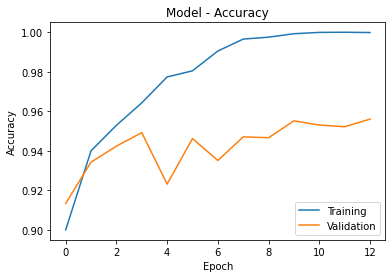

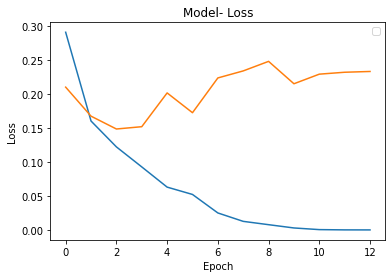

87/87 [==============================] - 0s 2ms/step


In [89]:
evaluate_model(history,test_set,test_labels,model)
y_pred=model.predict(test_set)

## Plotting Confusion matrix

Normalized confusion matrix


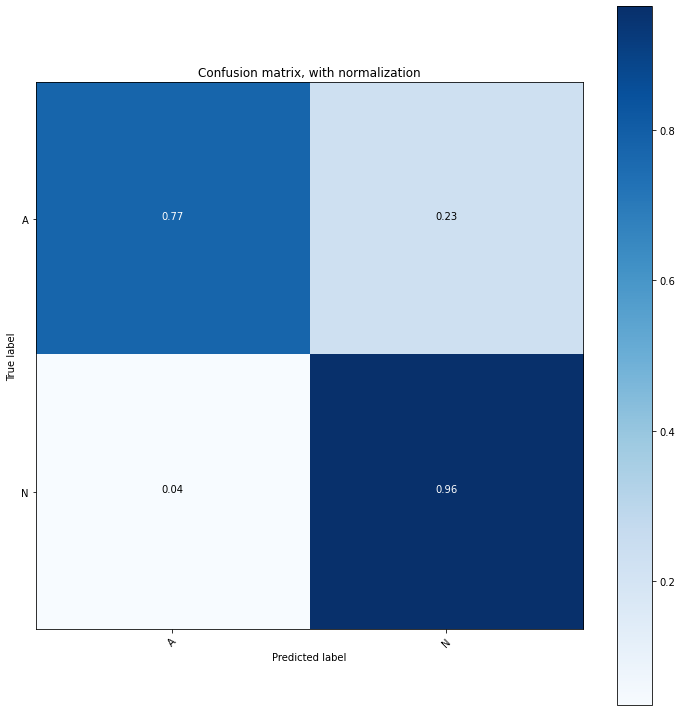

In [90]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['A', 'N'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()


## Model evaluation results
### Arrythmia cases were classified with an accuracy of 77%
### Normal cases were classified with an accuracy of 96%
### False positive for Arrythmia cases at 23%

## Imbalance present in the dataset

In [22]:
_,distribution = np.unique(np.argmax(training_labels,axis=1),return_counts=True)
print(distribution)

[ 1691 11580]


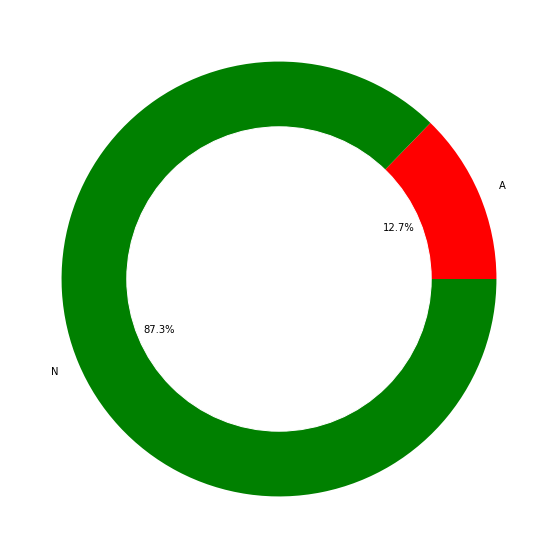

In [23]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(distribution, labels=['A','N'], colors=['red','green'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## Augmenting the minority class by either stretching or amplyfing the signal

In [20]:
import random
from scipy.signal import resample

In [41]:
def stretch(x):
    l = int(270 * (1 + (random.random()-0.5)/5))
    y = resample(x, l)
    if l < 270:
        y_ = np.zeros(shape=(270, ))
        y_[:l] = y
    else:
        y_ = y[:270]
    return y_

def amplify(x):
    alpha = (random.random()-0.5)
    normalized_x = (x-min(x))/(max(x)-min(x))

    if(random.random()>=0.5):
      factor = 1+alpha*(1-normalized_x)
    else:
      factor = 1+alpha*(normalized_x)
    
    for i in range(len(factor)):
      factor[i] = max(factor[i],0.8)
      factor[i] = min(factor[i],1.2)

    return x*factor

def augment(x,dup):
    result = np.zeros(shape= (dup, 270))
    for i in range(dup-1):
        if random.random() < 0.33:
            new_y = stretch(x)
        elif random.random() < 0.66:
            new_y = amplify(x)
        else:
            new_y = stretch(x)
            new_y = amplify(new_y)
        result[i, :] = new_y
    return result

In [52]:
training_set_N = []
training_label_N = []
training_set_A = []
training_label_A = []

for i in range(len(training_labels)):
  if(training_labels[i][1]==0):
    training_label_A.append(training_labels[i])
    training_set_A.append(training_set[i])
  else:
    training_label_N.append(training_labels[i])
    training_set_N.append(training_set[i])

training_set_A = np.array(training_set_A)
training_label_A = np.array(training_label_A)
training_set_N = np.array(training_set_N)
training_label_N = np.array(training_label_N)

#### Orange represents the augmented signal

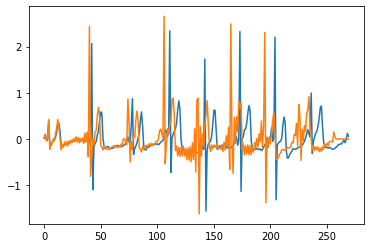

In [86]:
plt.plot(training_set_N[10012])
plt.plot(augment(training_set_N[10012],3)[0])
plt.show()

## Miniority class upsampled upto 57494 datapoints

In [54]:
result = np.apply_along_axis(augment, axis=1, arr=training_set_A, dup=33).reshape(-1, 270)
training_set_A = np.vstack([training_set_A, result])
training_label_A = np.vstack([training_label_A,np.tile([1,0],(result.shape[0],1))])

In [55]:
print(training_set_A.shape)
print(training_label_A.shape)

(57494, 270)
(57494, 2)


## Majority class upsampled upto 57900 datapoints

In [56]:
result = np.apply_along_axis(augment, axis=1, arr=training_set_N,dup=4).reshape(-1, 270)
training_set_N = np.vstack([training_set_N, result])
training_label_N = np.vstack([training_label_N,np.tile([0,1],(result.shape[0],1))])

In [57]:
print(training_set_N.shape)
print(training_label_N.shape)

(57900, 270)
(57900, 2)


## Upsampled training set consists of 115394 datapoints

In [58]:
training_set_upsample = np.concatenate((training_set_N,training_set_A))
training_label_upsample = np.concatenate((training_label_N,training_label_A))

In [59]:
training_set_upsample.shape

(115394, 270)

## Shuffling the upsampled training set

In [60]:
from sklearn.utils import shuffle

In [61]:
training_set_upsample, training_label_upsample = shuffle(training_set_upsample, training_label_upsample, random_state=0)

## Evaluation

In [81]:
model,history=network(training_set_upsample,training_label_upsample,validation_set,validation_labels)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)



Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/40
3607/3607 [==============================] - 23s 6ms/step - loss: 0.2433 - accuracy: 0.9032 - val_loss: 0.1959 - val_accuracy: 0.9227 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/40
3607/3607 [==============================] - 23s 6ms/step - loss: 0.1304 - accuracy: 0.9541 - val_loss: 0.2679 - val_accuracy: 0.9082 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/40
3607/3607 [==============================] - 21s 6ms/step - loss: 0.0994 - accuracy: 0.9665 - val_loss: 0.1586 - val_accuracy: 0.9577 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/40
3607/3607 [==============================] - 22s 6ms/step - loss: 0.0830 - accuracy: 0.9719 - val_loss: 0.1872 - val_accuracy: 0.9565 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/40
3607/3607 [==========================

### Accuracy on test set: 95.17%

Accuracy: 95.17%


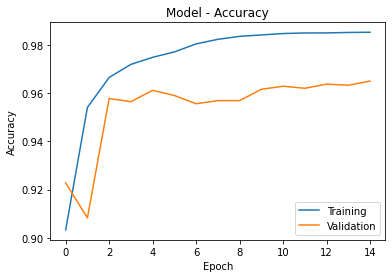

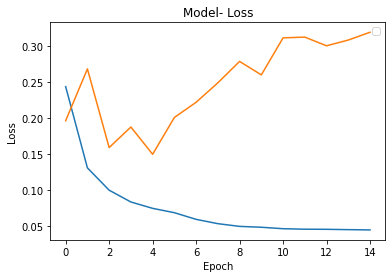

87/87 [==============================] - 0s 2ms/step


In [82]:
evaluate_model(history,test_set,test_labels,model)
y_pred=model.predict(test_set)

## Model evaluation results
### Arrythmia cases were classified with an accuracy of 84%
### Normal cases were classified with an accuracy of 97%
### False positive for Arrythmia cases at 16%

Normalized confusion matrix


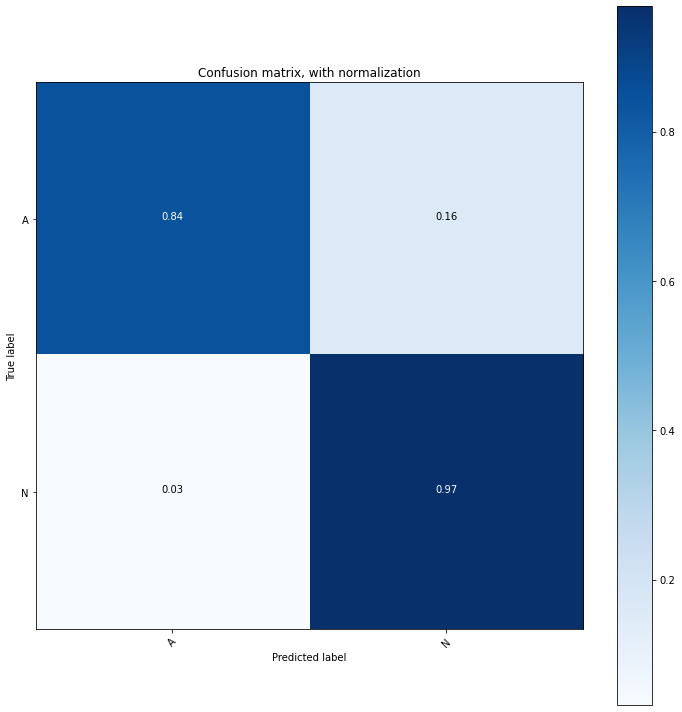

In [83]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['A', 'N'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()


## PCA for dimensonality reduction

In [91]:
from sklearn.decomposition import PCA

pca_270 = PCA(n_components=270)
X_pca = pca_270.fit_transform(training_set)

### As we can see almost all the features are not correlated and are neccessary for capturing the variability present in the dataset 

In [92]:
np.cumsum(pca_270.explained_variance_ratio_*100)

array([  3.37,   6.4 ,   9.25,  11.98,  14.61,  17.09,  19.55,  21.85,
        24.06,  26.19,  28.26,  30.21,  32.08,  33.81,  35.38,  36.87,
        38.23,  39.47,  40.59,  41.69,  42.62,  43.48,  44.31,  45.07,
        45.79,  46.43,  47.04,  47.65,  48.23,  48.8 ,  49.35,  49.87,
        50.38,  50.89,  51.39,  51.87,  52.34,  52.82,  53.28,  53.74,
        54.19,  54.63,  55.07,  55.5 ,  55.92,  56.34,  56.75,  57.17,
        57.58,  57.98,  58.37,  58.77,  59.16,  59.54,  59.92,  60.3 ,
        60.67,  61.05,  61.41,  61.78,  62.14,  62.49,  62.84,  63.19,
        63.54,  63.88,  64.22,  64.56,  64.89,  65.22,  65.55,  65.87,
        66.18,  66.5 ,  66.81,  67.12,  67.42,  67.72,  68.01,  68.3 ,
        68.59,  68.87,  69.15,  69.42,  69.69,  69.96,  70.23,  70.49,
        70.74,  71.  ,  71.25,  71.5 ,  71.75,  72.  ,  72.25,  72.49,
        72.73,  72.97,  73.2 ,  73.44,  73.67,  73.9 ,  74.13,  74.36,
        74.59,  74.81,  75.04,  75.26,  75.48,  75.7 ,  75.91,  76.13,
      

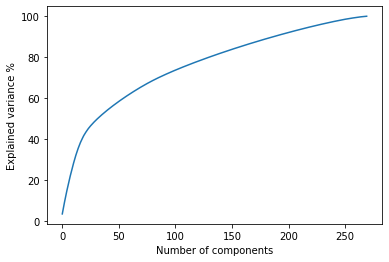

In [93]:
plt.plot(np.cumsum(pca_270.explained_variance_ratio_*100))

plt.xlabel("Number of components")
plt.ylabel("Explained variance %")
plt.show()

### 222 out of a total 270 components are required to capture 95% of variance present in the dataset

In [94]:
pca = PCA(n_components=0.95)
training_set_pca = pca.fit_transform(training_set)
validation_set_pca = pca.transform(validation_set)
training_set_pca.shape

(13271, 222)

### As we can see pca performs comparatively worse, this implies that features had non-linear relations which pca failed to capture in the lower dimension

### TO-DO: Try NLDR algorithms like FastICA, autoencoders for non-linear dimensionality reduction

In [95]:
model,history=network(training_set_pca,training_labels,validation_set_pca,validation_labels)


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/40


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


415/415 [==============================] - 5s 8ms/step - loss: 0.3823 - accuracy: 0.8714 - val_loss: 0.3650 - val_accuracy: 0.8741 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/40
415/415 [==============================] - 3s 6ms/step - loss: 0.3401 - accuracy: 0.8759 - val_loss: 0.3598 - val_accuracy: 0.8703 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/40
415/415 [==============================] - 3s 6ms/step - loss: 0.3087 - accuracy: 0.8848 - val_loss: 0.3620 - val_accuracy: 0.8749 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/40
415/415 [==============================] - 3s 6ms/step - loss: 0.2776 - accuracy: 0.8957 - val_loss: 0.3905 - val_accuracy: 0.8596 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/40
415/415 [==============================] - 3s 6ms/step - loss: 0.2396 - accuracy: 0.9078 - val_loss: 0.3943 - val_accuracy: 